In [ ]:
import numpy as np
from tqdm import tqdm

In [ ]:
class Person:
    death_rate = 0.01
    incubation_days = 5
    recovery_days = 30
    
    def __init__(self, exposed: bool = False):
        self.dead = False
        if exposed:
            self.susceptible = False
            self.exposed = True
        else:
            self.susceptible = True
            self.exposed = False
        
        self.infectious = False
        self.recovered = False
        self.since_infected = 0
        
    def death(self):
        if np.random.random() < self.death_rate:
            self.dead = True
            self.infectious = False
            
    def infection(self, infection_rate):
        if np.random.random() < infection_rate:
            self.exposed = True
            self.susceptible = False
            
    def incubation(self):
        self.since_infected += 1
        if self.since_infected > self.incubation_days:
            self.infectious = True
            self.exposed = False
    
    def recovery(self):
        self.death()
        self.since_infected += 1
        if not self.dead and self.since_infected > self.recovery_days:
            self.recovered = True
            self.infectious = False
            
    def update(self, infection_rate):
        if self.dead:
            pass
        elif self.susceptible:
            self.infection(infection_rate)
        elif self.exposed:
            self.incubation()
        elif self.infectious:
            self.recovery()
                        
class Society:
    infection_rate = 0.5
    
    def __init__(self, start_population: int = 100, exposed_rate: float = 0.01):
        self.init_statistics()
        
        self.population = []
        for person in range(start_population):
            if np.random.random() < exposed_rate:
                self.population.append(Person(exposed=True))
                self.exposed += 1
            else:
                self.population.append(Person())
                self.susceptible += 1
        
    def get_infetion_rate(self):
        return self.infectious / len(self.population) * self.infection_rate
        
    def init_statistics(self):
        self.dead = 0
        self.susceptible = 0
        self.exposed = 0
        self.infectious = 0
        self.recovered = 0
        
    def update(self):
        self.init_statistics()
        
        for person in self.population:
            person.update(self.get_infetion_rate())
            
            if person.dead:
                self.dead += 1
            elif person.susceptible:
                self.susceptible += 1
            elif person.exposed:
                self.exposed += 1
            elif person.infectious:
                self.infectious += 1
            elif person.recovered:
                self.recovered += 1
            

In [ ]:
simulation = Society(start_population=1000, exposed_rate=0.05)
days = range(1000)
dead = []
susceptible = []
exposed = []
infectious = []
recovered = []

In [ ]:
for year in tqdm(years):
    dead.append(simulation.dead)
    susceptible.append(simulation.susceptible)
    exposed.append(simulation.exposed)
    infectious.append(simulation.infectious)
    recovered.append(simulation.recovered)
    simulation.update()

100%|██████████| 1000/1000 [00:01<00:00, 565.16it/s]


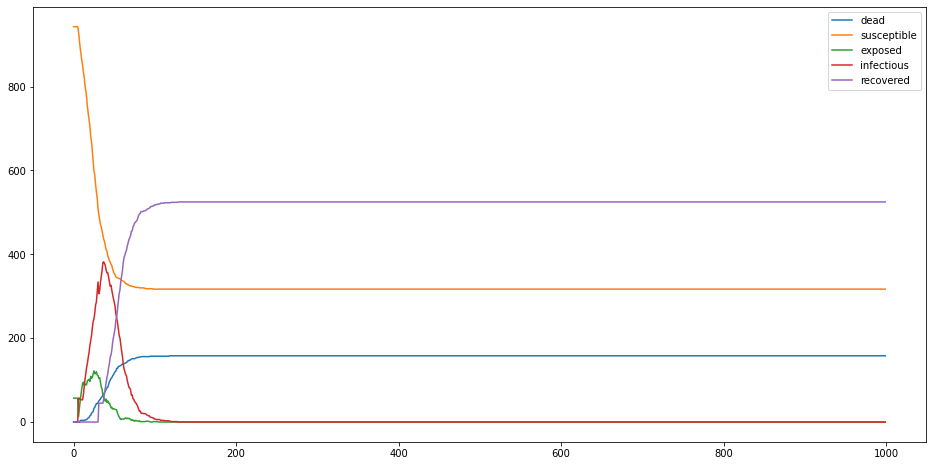

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(figsize = [16,8])
axes.plot(days, dead, label = 'dead')
axes.plot(days, susceptible, label = 'susceptible')
axes.plot(days, exposed, label = 'exposed')
axes.plot(days, infectious, label = 'infectious')
axes.plot(days, recovered, label = 'recovered')
axes.legend()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=978e47b7-a961-4dca-a945-499e8b781a34' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>